In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
from datetime import datetime

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid' , palette='tab10')

train=pd.read_csv('train.csv')

#查看train data是否有缺失值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2]:
#查看test data是否有缺失值
test=pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [3]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


[Text(0.5, 0, 'count'), Text(0.5, 1.0, 'Distribution of count')]

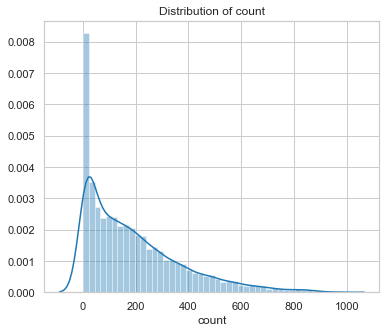

In [8]:
#check count密度分布
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(6,5)

sns.distplot(train['count'])

ax.set(xlabel='count',title='Distribution of count',)

In [9]:
train_WithoutOutliers = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())] 
train_WithoutOutliers .shape

(10739, 12)

[Text(0.5, 0, 'registered'), Text(0.5, 1.0, 'Distribution of count')]

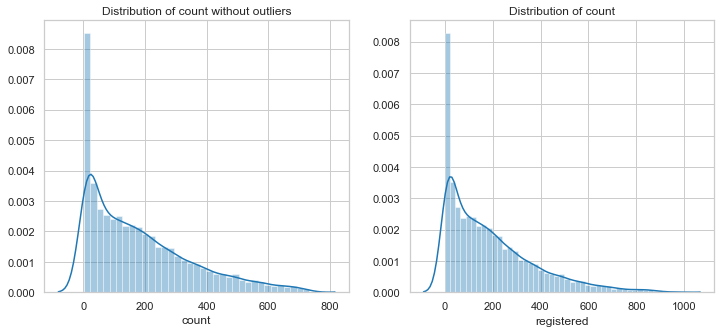

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_size_inches(12,5)

sns.distplot(train_WithoutOutliers['count'],ax=ax1)
sns.distplot(train['count'],ax=ax2)

ax1.set(xlabel='count',title='Distribution of count without outliers',)
ax2.set(xlabel='registered',title='Distribution of count')

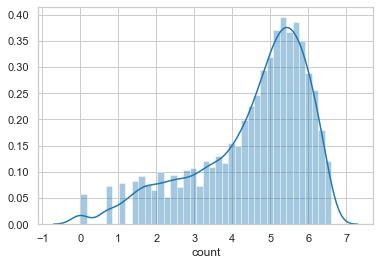

In [11]:
yLabels=train_WithoutOutliers['count']
yLabels_log=np.log(yLabels)
sns.distplot(yLabels_log)

In [12]:
Bike_data=pd.concat([train_WithoutOutliers,test],ignore_index=True)
Bike_data.shape

(17232, 12)

In [13]:
Bike_data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [14]:
Bike_data['date']=Bike_data.datetime.apply( lambda c : c.split( )[0])
Bike_data['hour']=Bike_data.datetime.apply( lambda c : c.split( )[1].split(':')[0]).astype('int')
Bike_data['year']=Bike_data.datetime.apply( lambda c : c.split( )[0].split('-')[0]).astype('int')
Bike_data['month']=Bike_data.datetime.apply( lambda c : c.split( )[0].split('-')[1]).astype('int')
Bike_data['weekday']=Bike_data.date.apply( lambda c : datetime.strptime(c,'%Y-%m-%d').isoweekday())
Bike_data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,month,weekday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,0,2011,1,6
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,1,2011,1,6
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011-01-01,2,2011,1,6
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011-01-01,3,2011,1,6
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011-01-01,4,2011,1,6


[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'Distribution of windspeed')]

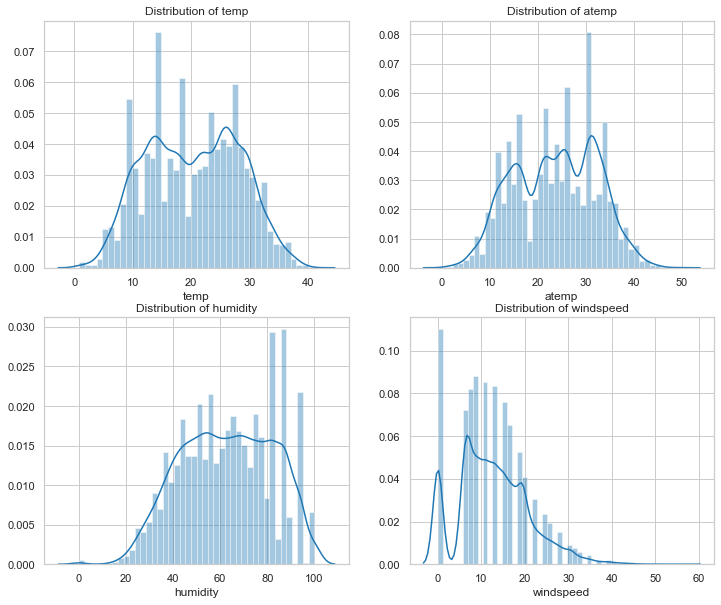

In [15]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12,10)

sns.distplot(Bike_data['temp'],ax=axes[0,0])
sns.distplot(Bike_data['atemp'],ax=axes[0,1])
sns.distplot(Bike_data['humidity'],ax=axes[1,0])
sns.distplot(Bike_data['windspeed'],ax=axes[1,1])

axes[0,0].set(xlabel='temp',title='Distribution of temp',)
axes[0,1].set(xlabel='atemp',title='Distribution of atemp')
axes[1,0].set(xlabel='humidity',title='Distribution of humidity')
axes[1,1].set(xlabel='windspeed',title='Distribution of windspeed')

In [16]:
from sklearn.ensemble import RandomForestRegressor

Bike_data["windspeed_rfr"]=Bike_data["windspeed"]
# 將數據分為等於0以及不等於0兩部分
dataWind0 = Bike_data[Bike_data["windspeed_rfr"]==0]
dataWindNot0 = Bike_data[Bike_data["windspeed_rfr"]!=0]
#選定模型
rfModel_wind = RandomForestRegressor(n_estimators=1000,random_state=42)
# 選定特徵
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
# 將楓樹不等於零的作為訓練集，fit到RandomForestRegressor之中
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed_rfr"])
#通过訓練好的模型預測風速
wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
#將預測好的風速填充到風速為零的數據中
dataWind0.loc[:,"windspeed_rfr"] = wind0Values
#數據連結
Bike_data = dataWindNot0.append(dataWind0)
Bike_data.reset_index(inplace=True)
Bike_data.drop('index',inplace=True,axis=1)

[Text(0.5, 0, 'windseed'), Text(0.5, 1.0, 'Distribution of windspeed')]

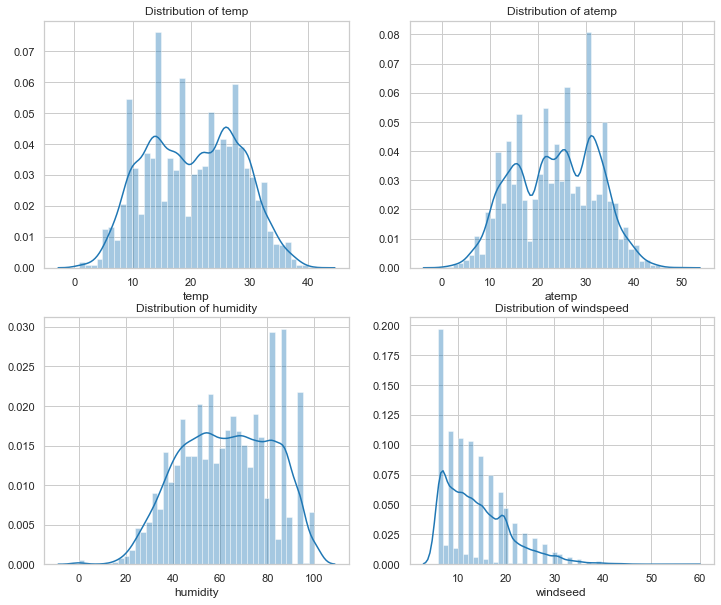

In [17]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12,10)

sns.distplot(Bike_data['temp'],ax=axes[0,0])
sns.distplot(Bike_data['atemp'],ax=axes[0,1])
sns.distplot(Bike_data['humidity'],ax=axes[1,0])
sns.distplot(Bike_data['windspeed_rfr'],ax=axes[1,1])

axes[0,0].set(xlabel='temp',title='Distribution of temp',)
axes[0,1].set(xlabel='atemp',title='Distribution of atemp')
axes[1,0].set(xlabel='humidity',title='Distribution of humidity')
axes[1,1].set(xlabel='windseed',title='Distribution of windspeed')

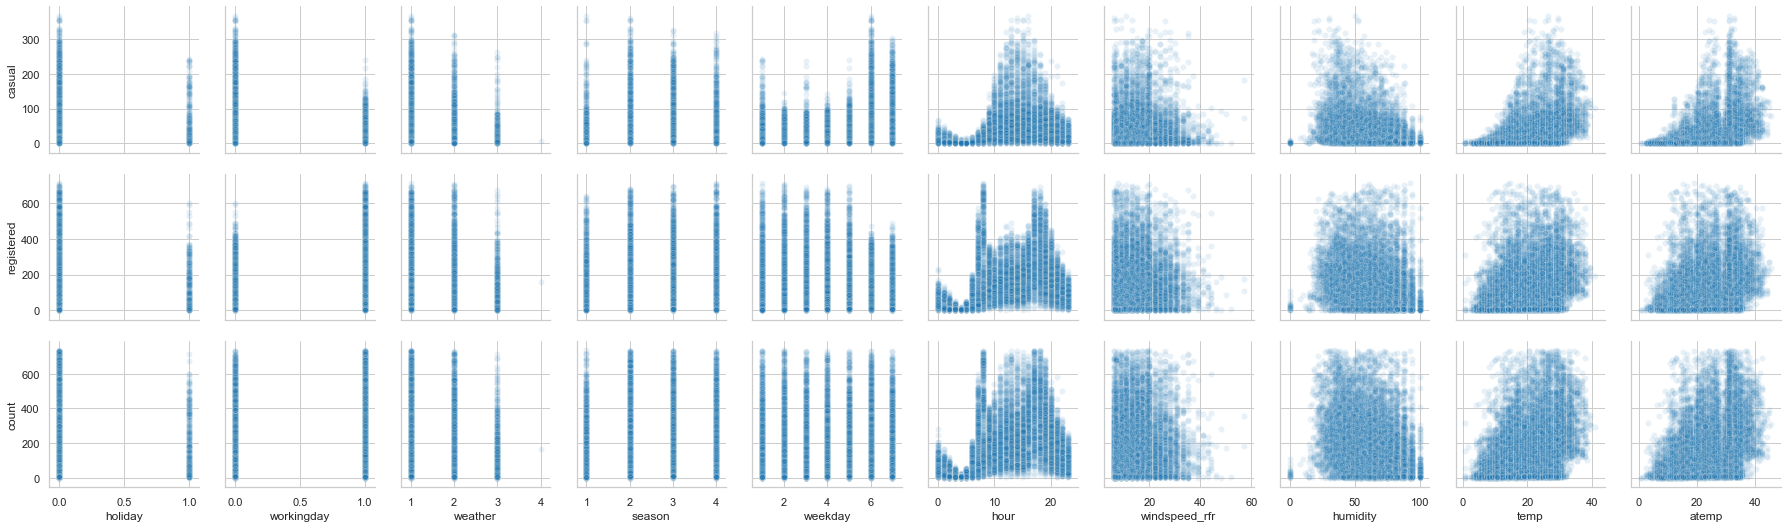

In [18]:
sns.pairplot(Bike_data ,x_vars=['holiday','workingday','weather','season',
                                'weekday','hour','windspeed_rfr','humidity','temp','atemp'] ,
                        y_vars=['casual','registered','count'] , plot_kws={'alpha': 0.1})

In [20]:
corrDf = Bike_data.corr() 

#ascending=False表示按降序排列
corrDf['count'].sort_values(ascending =False)

count            1.000000
registered       0.966209
casual           0.704764
hour             0.405437
temp             0.385954
atemp            0.381967
year             0.234959
month            0.164673
season           0.159801
windspeed_rfr    0.111686
windspeed        0.106074
weekday          0.022602
holiday          0.002978
workingday      -0.020764
weather         -0.127519
humidity        -0.317028
Name: count, dtype: float64

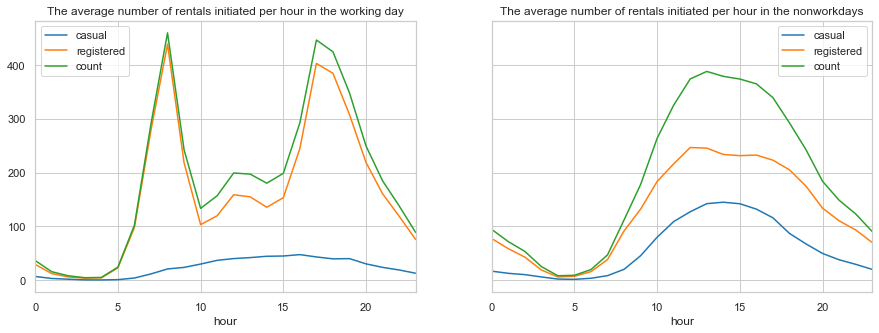

In [22]:
#時段對租賃數量的影響
workingday_df=Bike_data[Bike_data['workingday']==1]
workingday_df = workingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                    'registered':'mean',
                                                                    'count':'mean'})

nworkingday_df=Bike_data[Bike_data['workingday']==0]
nworkingday_df = nworkingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                      'registered':'mean', 
                                                                      'count':'mean'})
fig, axes = plt.subplots(1, 2,sharey = True)

workingday_df.plot(figsize=(15,5),title = 'The average number of rentals initiated per hour in the working day',ax=axes[0])
nworkingday_df.plot(figsize=(15,5),title = 'The average number of rentals initiated per hour in the nonworkdays',ax=axes[1])

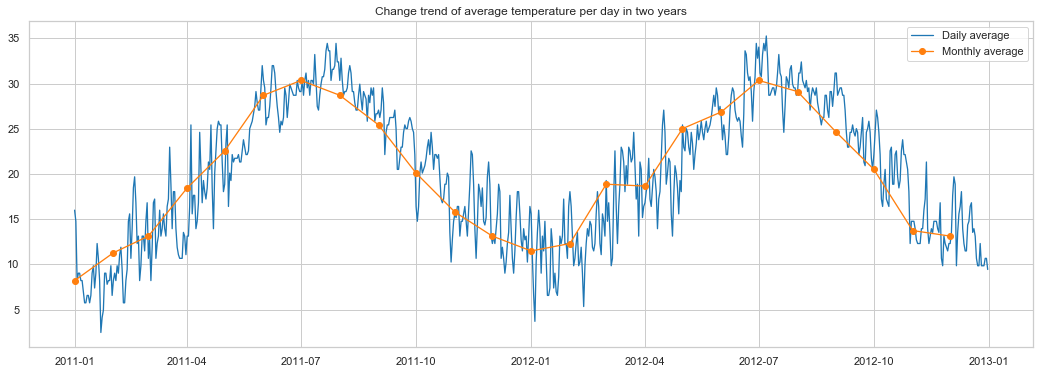

In [23]:
#温度對租賃數量的影響
#按小時統計太繁瑣,改取一天的中位數
temp_df = Bike_data.groupby(['date','weekday'], as_index=False).agg({'year':'mean',
                                                                     'month':'mean',
                                                                     'temp':'median'})
#由於測試數據集中沒有租賃資料,或導致折線圖有斷裂,所以將缺失數據丟棄
temp_df.dropna ( axis = 0 , how ='any', inplace = True )

#按天統計的波動仍然很大,再按月取日平均值
temp_month = temp_df.groupby(['year','month'], as_index=False).agg({'weekday':'min',
                                                                    'temp':'median'})

#將按天求和統計數據的日期轉換成datatime格式
temp_df['date']=pd.to_datetime(temp_df['date'])

#將按月統計數據設置成一列時間序列
temp_month.rename(columns={'weekday':'day'},inplace=True)
temp_month['date']=pd.to_datetime(temp_month[['year','month','day']])

#設置畫框尺寸
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)

#使用折線圖顯示租賃總是對時間的推移
plt.plot(temp_df['date'] , temp_df['temp'] , linewidth=1.3 , label='Daily average')
ax.set_title('Change trend of average temperature per day in two years')
plt.plot(temp_month['date'] , temp_month['temp'] , marker='o', linewidth=1.3 ,
         label='Monthly average')
ax.legend()

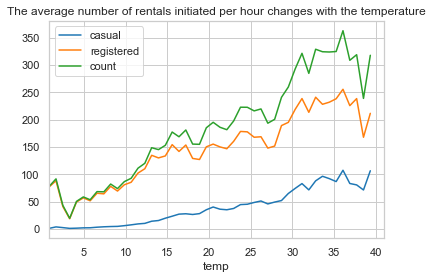

In [24]:
#按溫度取租賃平均值
temp_rentals = Bike_data.groupby(['temp'], as_index=True).agg({'casual':'mean', 
                                                               'registered':'mean',
                                                               'count':'mean'})
temp_rentals .plot(title = 'The average number of rentals initiated per hour changes with the temperature')
                   

Text(0.5, 1.0, 'Change trend of average humidity per day in two years')

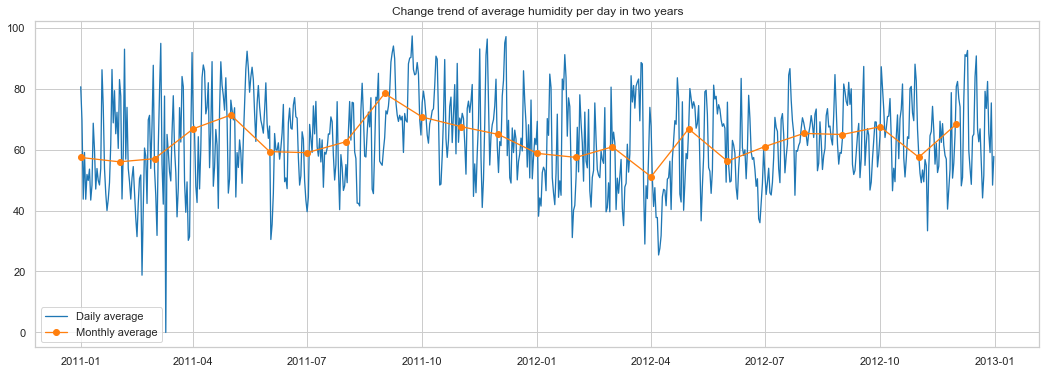

In [25]:
#濕度對租賃數量的影響
humidity_df = Bike_data.groupby('date', as_index=False).agg({'humidity':'mean'})
humidity_df['date']=pd.to_datetime(humidity_df['date'])
#將日期設置圍時間索引
humidity_df=humidity_df.set_index('date')

humidity_month = Bike_data.groupby(['year','month'], as_index=False).agg({'weekday':'min',
                                                                          'humidity':'mean'})
humidity_month.rename(columns={'weekday':'day'},inplace=True)
humidity_month['date']=pd.to_datetime(humidity_month[['year','month','day']])

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(humidity_df.index , humidity_df['humidity'] , linewidth=1.3,label='Daily average')
plt.plot(humidity_month['date'], humidity_month['humidity'] ,marker='o', 
         linewidth=1.3,label='Monthly average')
ax.legend()
ax.set_title('Change trend of average humidity per day in two years')

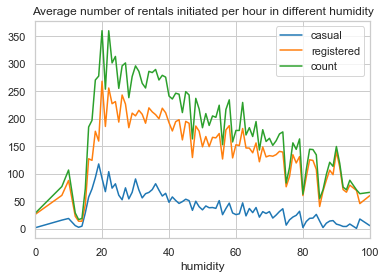

In [27]:
humidity_rentals = Bike_data.groupby(['humidity'], as_index=True).agg({'casual':'mean',
                                                                       'registered':'mean',
                                                                       'count':'mean'})
humidity_rentals .plot (title = 'Average number of rentals initiated per hour in different humidity')

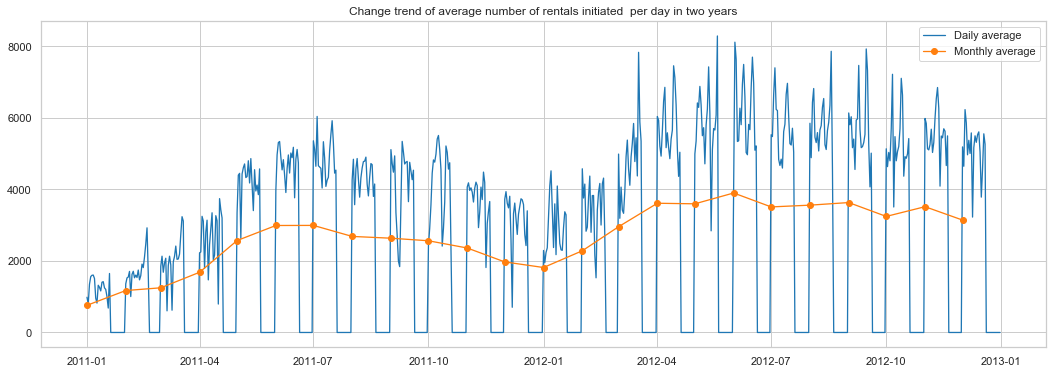

In [28]:
#年份,月份對租賃的影響
count_df = Bike_data.groupby(['date','weekday'], as_index=False).agg({'year':'mean',
                                                                      'month':'mean',
                                                                      'casual':'sum',
                                                                      'registered':'sum',
                                                                       'count':'sum'})
#由於測試數據集中沒有租賃資料,或導致折線圖有斷裂,所以將缺失數據丟棄
count_df.dropna ( axis = 0 , how ='any', inplace = True )

#按天統計的波動仍然很大,再按月取日平均值
count_month = count_df.groupby(['year','month'], as_index=False).agg({'weekday':'min',
                                                                      'casual':'mean', 
                                                                      'registered':'mean',
                                                                      'count':'mean'})

#日期轉換成datetime格式
count_df['date']=pd.to_datetime(count_df['date'])

#將按月統計數據設置成一列時間序列
count_month.rename(columns={'weekday':'day'},inplace=True)
count_month['date']=pd.to_datetime(count_month[['year','month','day']])

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)

#使用竹縣圖顯示時間對租賃總數(count)的整體影響
plt.plot(count_df['date'] , count_df['count'] , linewidth=1.3 , label='Daily average')
ax.set_title('Change trend of average number of rentals initiated  per day in two years')
plt.plot(count_month['date'] , count_month['count'] , marker='o', 
         linewidth=1.3 , label='Monthly average')
ax.legend()

In [30]:
day_df=Bike_data.groupby('date').agg({'year':'mean','season':'mean',
                                      'casual':'sum', 'registered':'sum'
                                      ,'count':'sum','temp':'mean',
                                      'atemp':'mean'})
season_df = day_df.groupby(['year','season'], as_index=True).agg({'casual':'mean', 
                                                                  'registered':'mean',
                                                                  'count':'mean'})
temp_df = day_df.groupby(['year','season'], as_index=True).agg({'temp':'mean', 
                                                                'atemp':'mean'})

In [31]:
count_weather = Bike_data.groupby('weather')
count_weather[['casual','registered','count']].count()

,casual,registered,count
weather,,,
1,7076,7076,7076
2,2809,2809,2809
3,853,853,853
4,1,1,1


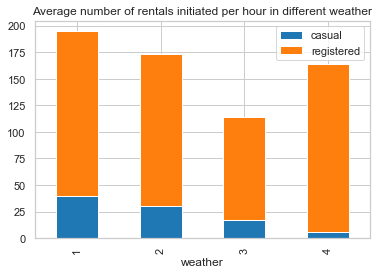

In [33]:
weather_df = Bike_data.groupby('weather', as_index=True).agg({'casual':'mean',
                                                              'registered':'mean'})
weather_df.plot.bar(stacked=True,title = 'Average number of rentals initiated per hour in different weather')

In [34]:
Bike_data[Bike_data['weather']==4]

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,month,weekday,windspeed_rfr
4921,11.365,6.0,164.0,2012-01-09 18:00:00,0,86,158.0,1,8.20,4,6.0032,1,2012-01-09,18,2012,1,1,6.0032
9581,9.850,NaN,NaN,2011-01-26 16:00:00,0,93,NaN,1,9.02,4,22.0028,1,2011-01-26,16,2011,1,3,22.0028
12274,6.820,NaN,NaN,2012-01-21 01:00:00,0,86,NaN,1,5.74,4,12.9980,0,2012-01-21,1,2012,1,6,12.9980


Text(0.5, 1.0, 'Change trend of average number of windspeed  per day in two years')

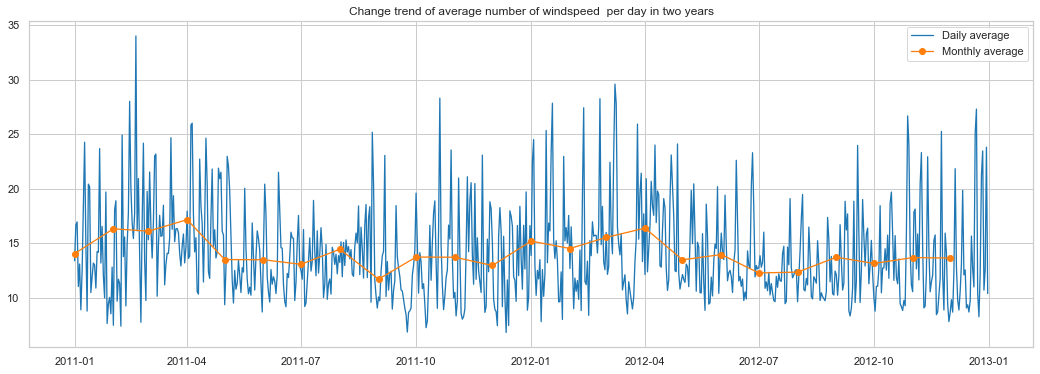

In [35]:
#風速對出行情況的影響
windspeed_df = Bike_data.groupby('date', as_index=False).agg({'windspeed_rfr':'mean'})
windspeed_df['date']=pd.to_datetime(windspeed_df['date'])
#將日期設為時間索引
windspeed_df=windspeed_df.set_index('date')

windspeed_month = Bike_data.groupby(['year','month'], as_index=False).agg({'weekday':'min',
                                                                           'windspeed_rfr':'mean'})
windspeed_month.rename(columns={'weekday':'day'},inplace=True)
windspeed_month['date']=pd.to_datetime(windspeed_month[['year','month','day']])

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(windspeed_df.index , windspeed_df['windspeed_rfr'] , linewidth=1.3,label='Daily average')
plt.plot(windspeed_month['date'], windspeed_month['windspeed_rfr'] ,
         marker='o', linewidth=1.3,label='Monthly average')
ax.legend()
ax.set_title('Change trend of average number of windspeed  per day in two years')


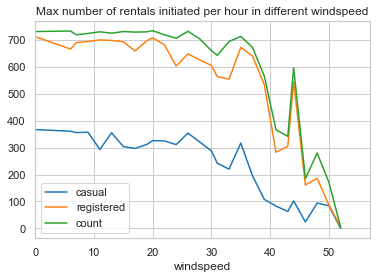

In [36]:
windspeed_rentals = Bike_data.groupby(['windspeed'], as_index=True).agg({'casual':'max', 
                                                                         'registered':'max',
                                                                         'count':'max'})
windspeed_rentals .plot(title = 'Max number of rentals initiated per hour in different windspeed')


In [37]:
df2=Bike_data[Bike_data['windspeed']>40]
df2=df2[df2['count']>400]
df2

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,month,weekday,windspeed_rfr
5721,31.06,52.0,597.0,2012-03-08 17:00:00,0,38,545.0,1,25.42,1,43.9989,1,2012-03-08,17,2012,3,4,43.9989


In [43]:
#日期對出行的影響
day_df = Bike_data.groupby(['date'], as_index=False).agg({'casual':'sum','registered':'sum',
                                                          'count':'sum', 'workingday':'mean',
                                                          'weekday':'mean','holiday':'mean',
                                                          'year':'mean'})
day_df.head()

,date,casual,registered,count,workingday,weekday,holiday,year
0,2011-01-01,331.0,654.0,985.0,0,6,0,2011
1,2011-01-02,131.0,670.0,801.0,0,7,0,2011
2,2011-01-03,120.0,1229.0,1349.0,1,1,0,2011
3,2011-01-04,108.0,1454.0,1562.0,1,2,0,2011
4,2011-01-05,82.0,1518.0,1600.0,1,3,0,2011


In [44]:
number_pei=day_df[['casual','registered']].mean()
number_pei

casual         517.411765
registered    2171.067031
dtype: float64

Text(0.5, 1.0, 'Casual or registered in the total lease')

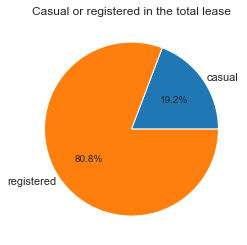

In [45]:
plt.axes(aspect='equal')  
plt.pie(number_pei, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.05 , radius=1 )  
plt.title('Casual or registered in the total lease')

(-1.4377319238880382,
 1.4303681868518114,
 -1.4388719783705668,
 1.4372896952393586)

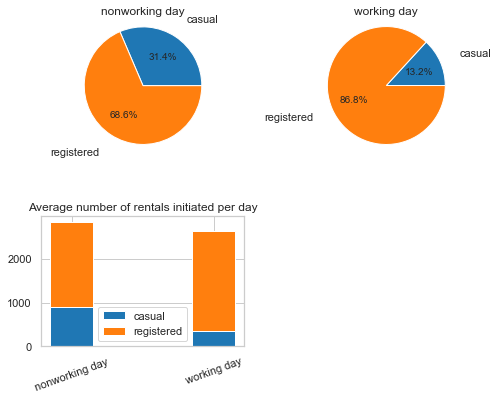

In [46]:
#工作日
workingday_df=day_df.groupby(['workingday'], as_index=True).agg({'casual':'mean', 
                                                                 'registered':'mean'})
workingday_df_0 = workingday_df.loc[0]
workingday_df_1 = workingday_df.loc[1]

# plt.axes(aspect='equal')
fig = plt.figure(figsize=(8,6)) 
plt.subplots_adjust(hspace=0.5, wspace=0.2)     
grid = plt.GridSpec(2, 2, wspace=0.5, hspace=0.5)   

plt.subplot2grid((2,2),(1,0), rowspan=2)
width = 0.3       # 設置條寬

p1 = plt.bar(workingday_df.index,workingday_df['casual'], width)
p2 = plt.bar(workingday_df.index,workingday_df['registered'], 
             width,bottom=workingday_df['casual'])
plt.title('Average number of rentals initiated per day')
plt.xticks([0,1], ('nonworking day', 'working day'),rotation=20)
plt.legend((p1[0], p2[0]), ('casual', 'registered'))

plt.subplot2grid((2,2),(0,0))
plt.pie(workingday_df_0, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.35 , radius=1.3)
plt.axis('equal') 
plt.title('nonworking day')

plt.subplot2grid((2,2),(0,1))
plt.pie(workingday_df_1, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.35 , radius=1.3)
plt.title('working day')
plt.axis('equal') 

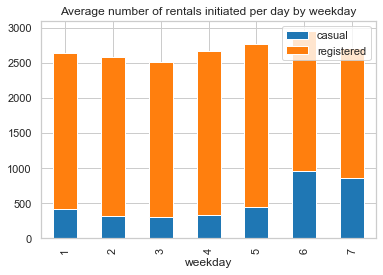

In [48]:
weekday_df= day_df.groupby(['weekday'], as_index=True).agg({'casual':'mean', 'registered':'mean'})
weekday_df.plot.bar(stacked=True , title = 'Average number of rentals initiated per day by weekday')

In [51]:
#節慶日
holiday_coun=day_df.groupby('year', as_index=True).agg({'holiday':'sum'})
holiday_coun


,holiday
year,
2011,10
2012,11


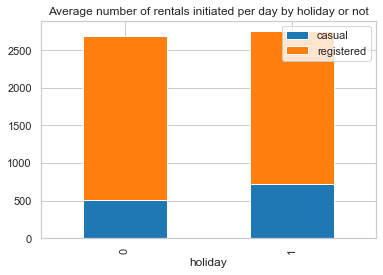

In [52]:
holiday_df = day_df.groupby('holiday', as_index=True).agg({'casual':'mean', 'registered':'mean'})
holiday_df.plot.bar(stacked=True , title = 'Average number of rentals initiated per day by holiday or not')

In [38]:
#選擇特徵值
dummies_month = pd.get_dummies(Bike_data['month'], prefix= 'month')
dummies_season=pd.get_dummies(Bike_data['season'],prefix='season')
dummies_weather=pd.get_dummies(Bike_data['weather'],prefix='weather')
dummies_year=pd.get_dummies(Bike_data['year'],prefix='year')
#把5个新的DF和原来的表连接起来
Bike_data=pd.concat([Bike_data,dummies_month,dummies_season,dummies_weather,dummies_year],axis=1)

In [39]:
#分離訓練集與測試集
dataTrain = Bike_data[pd.notnull(Bike_data['count'])]
dataTest= Bike_data[~pd.notnull(Bike_data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels=dataTrain['count']
yLabels_log=np.log(yLabels)

In [40]:
#把不要的列丟棄

dropFeatures = ['casual' , 'count' , 'datetime' , 'date' , 'registered' ,
                'windspeed' , 'atemp' , 'month','season','weather', 'year' ]

dataTrain = dataTrain.drop(dropFeatures , axis=1)
dataTest = dataTest.drop(dropFeatures , axis=1)

In [41]:
#使用rf訓練模型
rfModel = RandomForestRegressor(n_estimators=1000 , random_state = 42)

rfModel.fit(dataTrain , yLabels_log)

preds = rfModel.predict( X = dataTrain)

In [42]:
#預測測試集數據
predsTest= rfModel.predict(X = dataTest)

submission=pd.DataFrame({'datetime':datetimecol , 'count':[max(0,x) for x in np.exp(predsTest)]})

submission.to_csv('bike_predictions.csv',index=False)